## Import Librarires

In [1]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_columns', None)
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Read Data

In [2]:
df=pd.read_csv('weblog.csv')

In [3]:
df.head()

,IP,Time,URL,Staus
0,10.128.2.1,[29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200
1,10.128.2.1,[29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302
2,10.128.2.1,[29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200
3,10.131.2.1,[29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200
4,10.130.2.1,[29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200


## Some Exploration

In [4]:
df.describe()

,IP,Time,URL,Staus
count,16009,16009,16008,16008
unique,16,7307,314,13
top,10.128.2.1,cannot,GET /login.php HTTP/1.1,200
freq,4258,167,3284,11331


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16009 entries, 0 to 16008
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   IP      16009 non-null  object
 1   Time    16009 non-null  object
 2   URL     16008 non-null  object
 3   Staus   16008 non-null  object
dtypes: object(4)
memory usage: 500.4+ KB


In [6]:
df.isna().sum()

IP       0
Time     0
URL      1
Staus    1
dtype: int64

In [7]:
df.duplicated().sum()

2570

## Rename a column

In [8]:
df = df.rename(columns={'Staus': 'Status'}, index={'ONE': 'one'})

# Remove duplicated data

In [9]:
df=df.drop_duplicates(keep=False)

In [10]:
df.duplicated().sum()

0

## Remove Nan Values rows

In [11]:
nullRows=df[df.isnull().any(axis=1)]

In [12]:
nullRows

,IP,Time,URL,Status
16007,10.128.2.1,[02/Mar/2018:15:45:53,NaN,200
16008,10.131.0.1,[02/Mar/2018:06:34:16,GET /bootstrap-3.3.7/js/bootstrap.min.js HTTP/1.1,NaN


In [13]:
nullIndex=nullRows.index
nullIndex

Index([16007, 16008], dtype='int64')

In [14]:
df=df.drop(nullIndex)

In [15]:
df.isna().sum()

IP        0
Time      0
URL       0
Status    0
dtype: int64

## Transform Time to date format

In [16]:
dfTest=df.copy()

In [17]:
df['Time']=df['Time'].map(lambda x: x.lstrip('['))
df.head()


,IP,Time,URL,Status
0,10.128.2.1,29/Nov/2017:06:58:55,GET /login.php HTTP/1.1,200
1,10.128.2.1,29/Nov/2017:06:59:02,POST /process.php HTTP/1.1,302
2,10.128.2.1,29/Nov/2017:06:59:03,GET /home.php HTTP/1.1,200
3,10.131.2.1,29/Nov/2017:06:59:04,GET /js/vendor/moment.min.js HTTP/1.1,200
4,10.130.2.1,29/Nov/2017:06:59:06,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200


split return 2 colonnes one is the date and the other is the hours/minutes/secondes

In [18]:
df['Time']=df['Time'].str.split(':',n=1, expand = True)[0]
df.head()

,IP,Time,URL,Status
0,10.128.2.1,29/Nov/2017,GET /login.php HTTP/1.1,200
1,10.128.2.1,29/Nov/2017,POST /process.php HTTP/1.1,302
2,10.128.2.1,29/Nov/2017,GET /home.php HTTP/1.1,200
3,10.131.2.1,29/Nov/2017,GET /js/vendor/moment.min.js HTTP/1.1,200
4,10.130.2.1,29/Nov/2017,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200


In [19]:
df['Time'][0]

'29/Nov/2017'

In [20]:
#converting the date_time into datetime format
df['month'] = df['Time'].str.slice(3, 6)
df['day'] = df['Time'].str.slice(0, 2)
df.head()

,IP,Time,URL,Status,month,day
0,10.128.2.1,29/Nov/2017,GET /login.php HTTP/1.1,200,Nov,29
1,10.128.2.1,29/Nov/2017,POST /process.php HTTP/1.1,302,Nov,29
2,10.128.2.1,29/Nov/2017,GET /home.php HTTP/1.1,200,Nov,29
3,10.131.2.1,29/Nov/2017,GET /js/vendor/moment.min.js HTTP/1.1,200,Nov,29
4,10.130.2.1,29/Nov/2017,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200,Nov,29


## Get Methods and generate a clean Url

In [21]:
df['Methods'] = df['URL'].str.split('/').str[0]
df

,IP,Time,URL,Status,month,day,Methods
0,10.128.2.1,29/Nov/2017,GET /login.php HTTP/1.1,200,Nov,29,GET
1,10.128.2.1,29/Nov/2017,POST /process.php HTTP/1.1,302,Nov,29,POST
2,10.128.2.1,29/Nov/2017,GET /home.php HTTP/1.1,200,Nov,29,GET
3,10.131.2.1,29/Nov/2017,GET /js/vendor/moment.min.js HTTP/1.1,200,Nov,29,GET
4,10.130.2.1,29/Nov/2017,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200,Nov,29,GET
...,...,...,...,...,...,...,...
16002,10.130.2.1,02/Mar/2018,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200,Mar,02,GET
16003,10.130.2.1,02/Mar/2018,GET /allsubmission.php HTTP/1.1,200,Mar,02,GET
16004,10.130.2.1,02/Mar/2018,GET /showcode.php?id=309&nm=ham05 HTTP/1.1,200,Mar,02,GET
16005,10.130.2.1,02/Mar/2018,GET /allsubmission.php HTTP/1.1,200,Mar,02,GET


In [22]:
df['URL_new']=df['URL']

In [23]:
import  re
for index in df.index:
    result=re.search('^(GET|POST|HEAD|PUT|DELETE)(.*)HTTP',df['URL'].get(index,default=""))
    if(result):
        df['URL_new'][index]=result.group(2)
df.head()

,IP,Time,URL,Status,month,day,Methods,URL_new
0,10.128.2.1,29/Nov/2017,GET /login.php HTTP/1.1,200,Nov,29,GET,/login.php
1,10.128.2.1,29/Nov/2017,POST /process.php HTTP/1.1,302,Nov,29,POST,/process.php
2,10.128.2.1,29/Nov/2017,GET /home.php HTTP/1.1,200,Nov,29,GET,/home.php
3,10.131.2.1,29/Nov/2017,GET /js/vendor/moment.min.js HTTP/1.1,200,Nov,29,GET,/js/vendor/moment.min.js
4,10.130.2.1,29/Nov/2017,GET /bootstrap-3.3.7/js/bootstrap.js HTTP/1.1,200,Nov,29,GET,/bootstrap-3.3.7/js/bootstrap.js


Text(0.5, 1.0, 'Most Popular Methods by the Users')

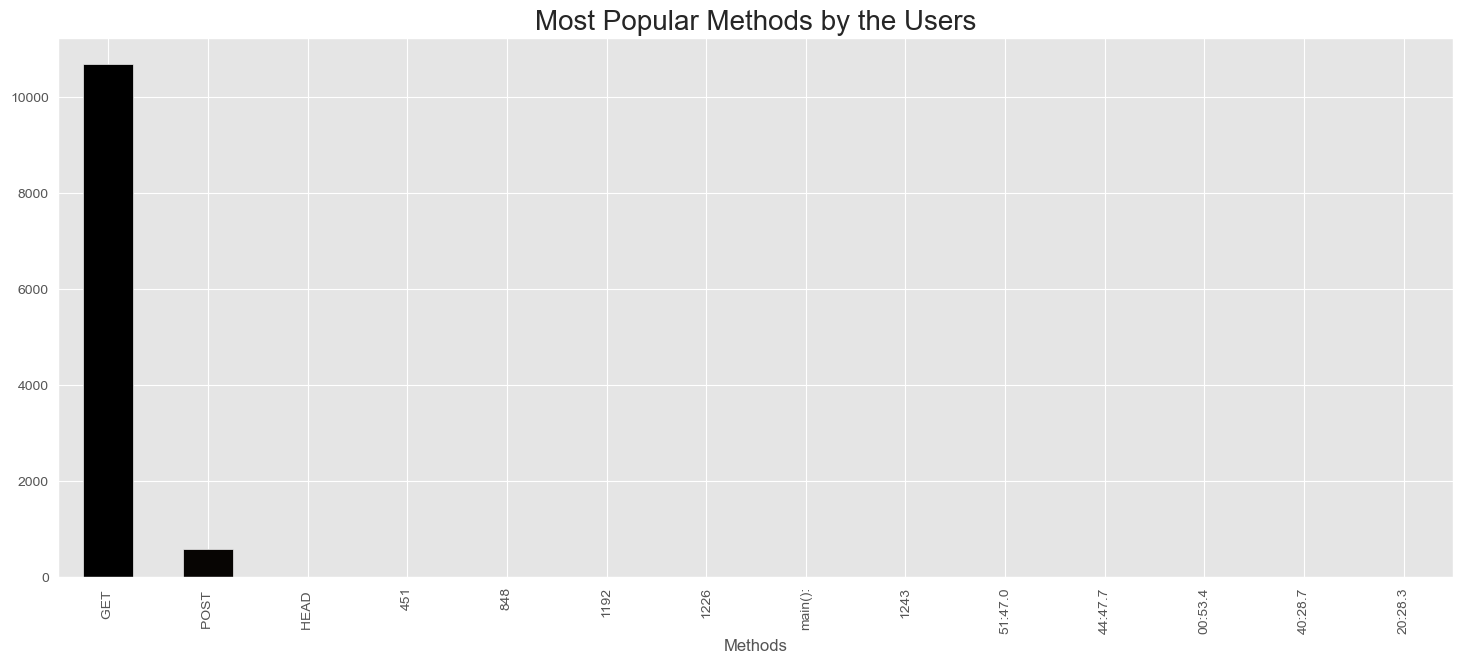

In [24]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
df['Methods'].value_counts().head(40).plot.bar(color = color)
plt.title('Most Popular Methods by the Users', fontsize = 20)

## Visualisation

Text(0.5, 1.0, 'Most Popular URLs by the Users')

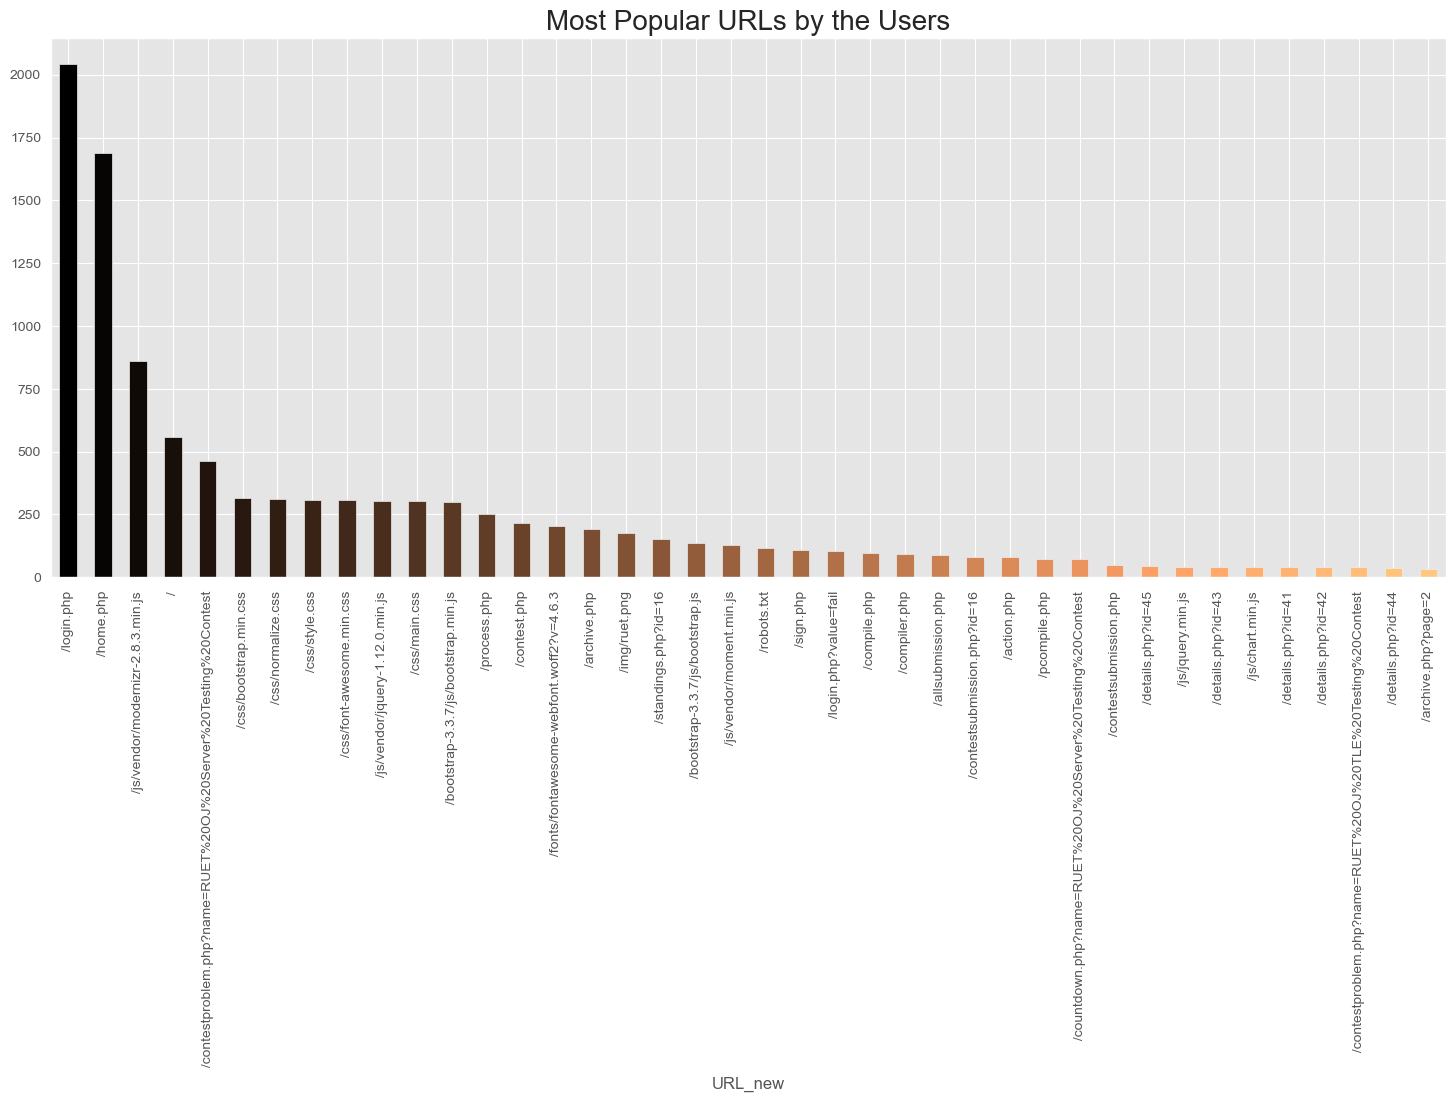

In [25]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
df['URL_new'].value_counts().head(40).plot.bar(color = color)
plt.title('Most Popular URLs by the Users', fontsize = 20)

Text(0.5, 1.0, 'Most Popular Months of Logins')

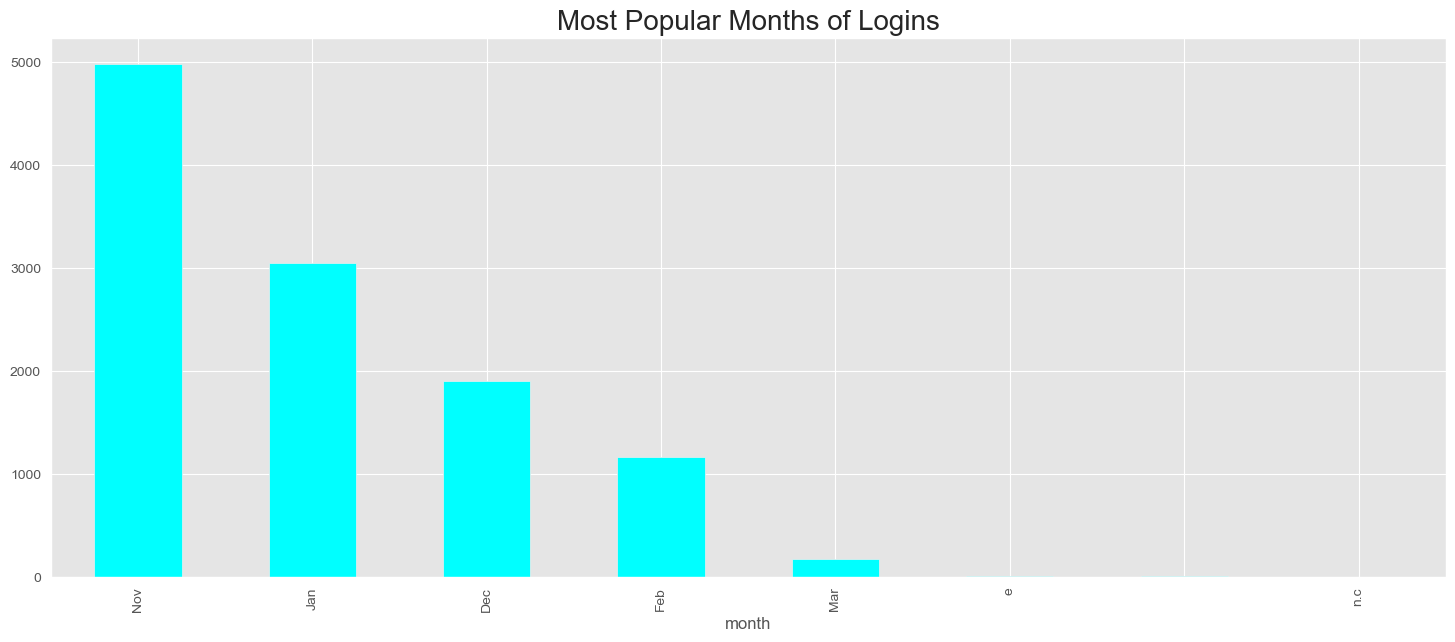

In [26]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
df['month'].value_counts().head(40).plot.bar(color = 'cyan')
plt.title('Most Popular Months of Logins', fontsize = 20)

Text(0.5, 1.0, 'Most Popular Days of Logins')

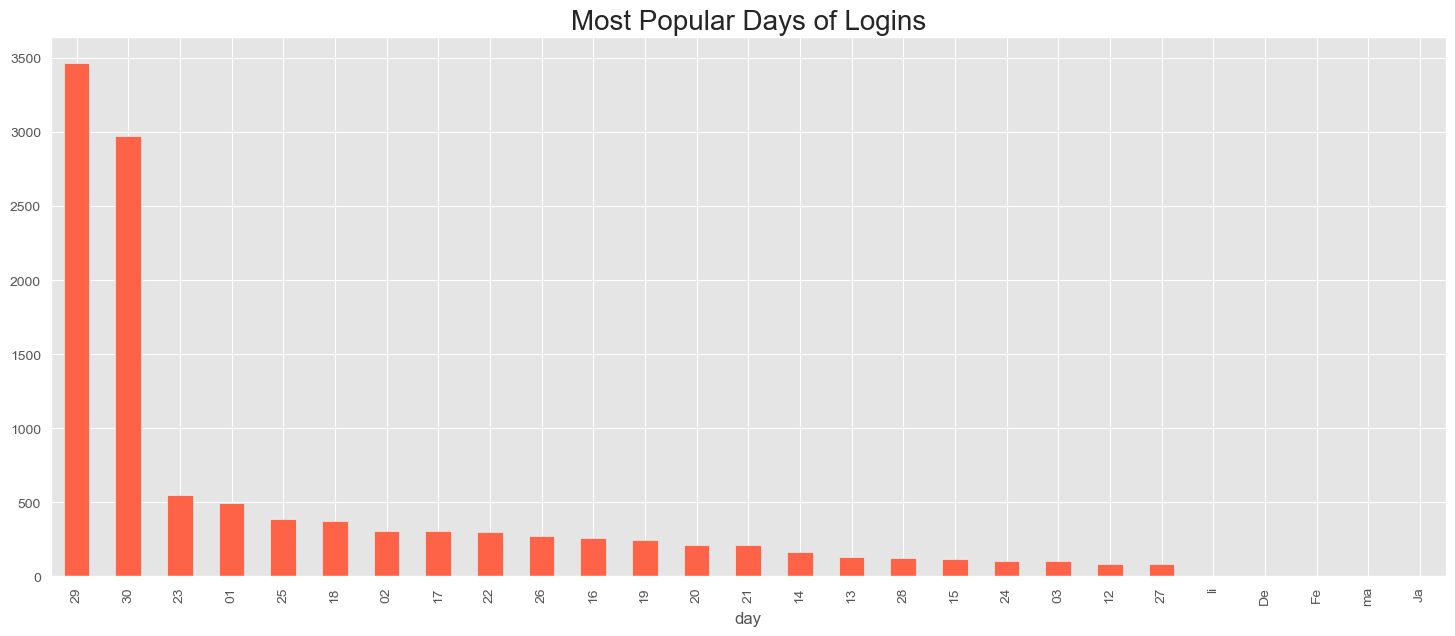

In [27]:
plt.rcParams['figure.figsize'] = (18, 7)

color = plt.cm.copper(np.linspace(0, 1, 40))
df['day'].value_counts().head(40).plot.bar(color = 'tomato')
plt.title('Most Popular Days of Logins', fontsize = 20)

Text(0.5, 1.0, 'Most Popular statuses for the Users')

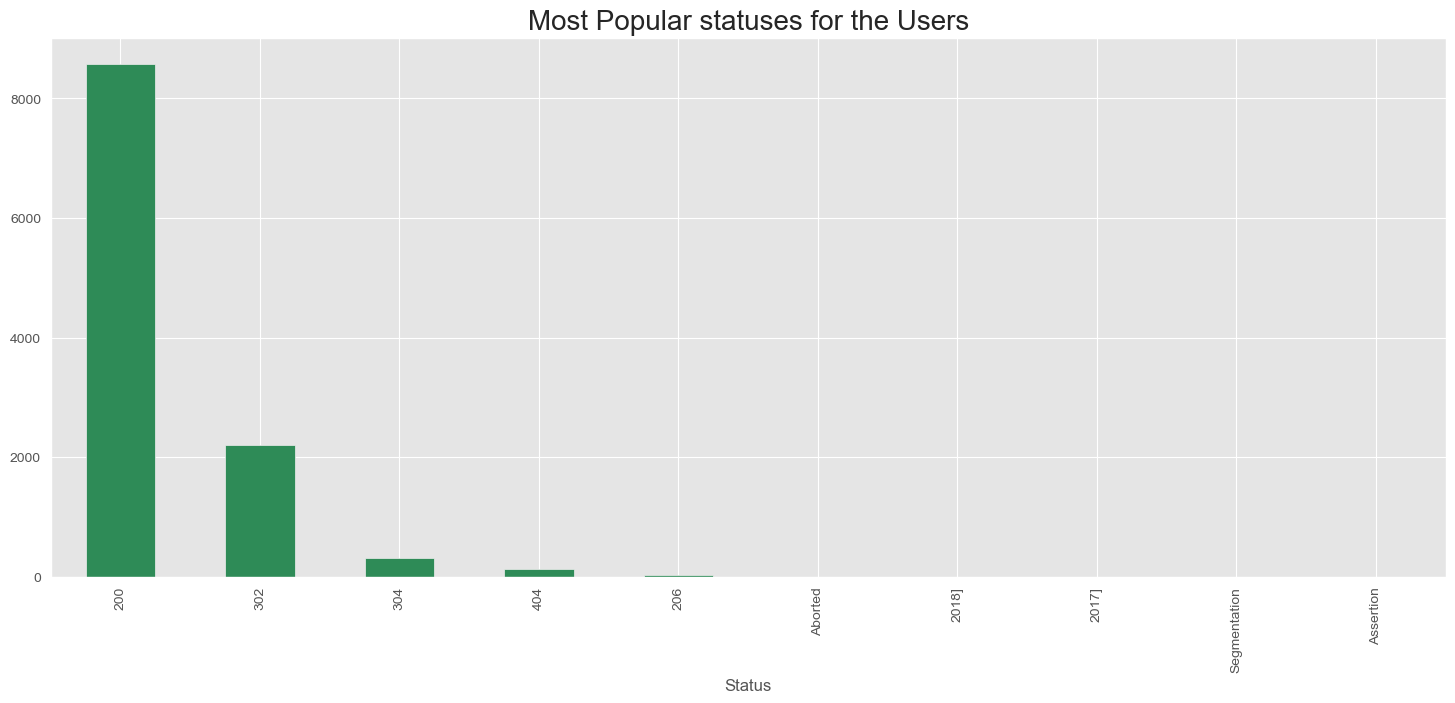

In [28]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.Wistia(np.linspace(0, 1, 40))
df['Status'].value_counts().head(40).plot.bar(color = 'seagreen')
plt.title('Most Popular statuses for the Users', fontsize = 20)

